# Train Test Splits, Cross Validation, and Linear Regression

![Lregressions.png](Assets/LinearRegr.png)

# Learning Objectives

- Explain the difference between over-fitting and under-fitting a model
- Describe Bias-variance tradeoffs
- Find the optimal training and test data set splits, cross-validation, and model complexity versus error
- Apply a linear regression model for supervised learning
- Apply Intel® Extension for Scikit-learn* to leverage underlying compute capabilities of hardware

# scikit-learn*

Frameworks provide structure that Data Scientists use to build code. Frameworks are more than just libraries, because in addition to callable code, frameworks influence how code is written.

A main virtue of using an optimized framework is that code runs faster. Code that runs faster is just generally more convenient but when we begin looking at applied data science and AI models, we can see more material benefits. Here you will see how optimization, particularly hyperparameter optimization can benefit more than just speed.

These exercises will demonstrate how to apply **the Intel® Extension for Scikit-learn*,** a seamless way to speed up your Scikit-learn application. The acceleration is achieved through the use of the Intel® oneAPI Data Analytics Library (oneDAL). Patching is the term used to extend scikit-learn with Intel optimizations and makes it a well-suited machine learning framework for dealing with real-life problems.

To get optimized versions of many Scikit-learn algorithms using a patch() approach consisting of adding these lines of code prior to importing sklearn:

- **from sklearnex import patch_sklearn**
- **patch_sklearn()**

## This exercise relies on installation of  Intel® Extension for Scikit-learn*

If you have not already done so, follow the instructions from Week 1 for instructions

## Introduction

We will be working with a data set based on [housing prices in Ames, Iowa](https://www.kaggle.com/c/house-prices-advanced-regression-techniques). It was compiled for educational use to be a modernized and expanded alternative to the well-known Boston Housing dataset. This version of the data set has had some missing values filled for convenience.

There are an extensive number of features, so they've been described in the table below.

### Predictor

* SalePrice: The property's sale price in dollars.


### Features

<table>
  <tbody>    
    <tr valign="top">
      <td valign="top">
        <ul>
          <li>MoSold: Month Sold</li>
          <li>YrSold: Year Sold</li><br>
          
          <li>SaleType: Type of sale</li>
          <li>SaleCondition: Condition of sale</li><br>

          <li>MSSubClass: The building class</li>
          <li>MSZoning: The general zoning classification</li><br>

          <li>Neighborhood: Physical locations within Ames city limits</li>
          <li>Street: Type of road access</li>
          <li>Alley: Type of alley access</li><br>

          <li>LotArea: Lot size in square feet</li>
          <li>LotConfig: Lot configuration</li>
          <li>LotFrontage: Linear feet of street connected to property</li>
          <li>LotShape: General shape of property</li><br>

          <li>LandSlope: Slope of property</li>
          <li>LandContour: Flatness of the property</li><br>

          <li>YearBuilt: Original construction date</li>
          <li>YearRemodAdd: Remodel date</li>
          <li>OverallQual: Overall material and finish quality</li>
          <li>OverallCond: Overall condition rating</li><br>

          <li>Utilities: Type of utilities available</li>
          <li>Foundation: Type of foundation</li>
          <li>Functional: Home functionality rating</li><br>

          <li>BldgType: Type of dwelling</li>
          <li>HouseStyle: Style of dwelling</li><br>
          
          <li>1stFlrSF: First Floor square feet</li>
          <li>2ndFlrSF: Second floor square feet</li>
          <li>LowQualFinSF: Low quality finished square feet (all floors)</li>
          <li>GrLivArea: Above grade (ground) living area square feet</li>
          <li>TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)</li><br>

          <li>Condition1: Proximity to main road or railroad</li>
          <li>Condition2: Proximity to main road or railroad (if a second is present)</li><br>
          
          <li>RoofStyle: Type of roof</li>
          <li>RoofMatl: Roof material</li><br>

          <li>ExterQual: Exterior material quality</li>
          <li>ExterCond: Present condition of the material on the exterior</li>
          <li>Exterior1st: Exterior covering on house</li>
          <li>Exterior2nd: Exterior covering on house (if more than one material)</li><br><br>
          
        </ul>
      </td>
      
      <td valign="top">
        <ul>
          <li>MasVnrType: Masonry veneer type</li>
          <li>MasVnrArea: Masonry veneer area in square feet</li><br>
          
          <li>WoodDeckSF: Wood deck area in square feet</li>
          <li>OpenPorchSF: Open porch area in square feet</li>
          <li>EnclosedPorch: Enclosed porch area in square feet</li>
          <li>3SsnPorch: Three season porch area in square feet</li>
          <li>ScreenPorch: Screen porch area in square feet</li><br>

          <li>PoolArea: Pool area in square feet</li>
          <li>PoolQC: Pool quality</li>
          <li>Fence: Fence quality</li>
          <li>PavedDrive: Paved driveway</li><br>

          <li>GarageType: Garage location</li>
          <li>GarageYrBlt: Year garage was built</li>
          <li>GarageFinish: Interior finish of the garage</li>
          <li>GarageCars: Size of garage in car capacity</li>
          <li>GarageArea: Size of garage in square feet</li>
          <li>GarageQual: Garage quality</li>
          <li>GarageCond: Garage condition</li><br>

          <li>Heating: Type of heating</li>
          <li>HeatingQC: Heating quality and condition</li>
          <li>CentralAir: Central air conditioning</li>
          <li>Electrical: Electrical system</li><br>
          
          <li>FullBath: Full bathrooms above grade</li>
          <li>HalfBath: Half baths above grade</li><br>
          
          <li>BedroomAbvGr: Number of bedrooms above basement level</li><br>
          
          <li>KitchenAbvGr: Number of kitchens</li>
          <li>KitchenQual: Kitchen quality</li><br>
          
          <li>Fireplaces: Number of fireplaces</li>
          <li>FireplaceQu: Fireplace quality</li><br>
          
          <li>MiscFeature: Miscellaneous feature not covered in other categories</li>
          <li>MiscVal: Value of miscellaneous feature</li><br>
          
          <li>BsmtQual: Height of the basement</li>
          <li>BsmtCond: General condition of the basement</li>
          <li>BsmtExposure: Walkout or garden level basement walls</li>
          <li>BsmtFinType1: Quality of basement finished area</li>
          <li>BsmtFinSF1: Type 1 finished square feet</li>
          <li>BsmtFinType2: Quality of second finished area (if present)</li>
          <li>BsmtFinSF2: Type 2 finished square feet</li>
          <li>BsmtUnfSF: Unfinished square feet of basement area</li>
          <li>BsmtFullBath: Basement full bathrooms</li>
          <li>BsmtHalfBath: Basement half bathrooms</li>
          <li>TotalBsmtSF: Total square feet of basement area</li>
        </ul>
      </td>
    </tr>
    
  </tbody>
</table>


In [21]:
from __future__ import print_function
import os

# Data path
data_path = '/content/Ames_Housing_Sales.csv'

# Required imports
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


## Question 1

* Import the data using Pandas and examine the shape. There are 79 feature columns plus the predictor, the sale price (`SalePrice`).
* There are three different types: integers (`int64`), floats (`float64`), and strings (`object`, categoricals). Examine how many there are of each data type.

In [24]:
from __future__ import print_function
import os
import pandas as pd # Import the pandas library

# Data path
data_path = '/content/Ames_Housing_Sales.csv'

# Required imports
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the data into a pandas DataFrame called 'data'
data = pd.read_csv(data_path) # Load data from CSV file

# Display the count of each data type
print(data.dtypes.value_counts())

object     43
float64    21
int64      16
Name: count, dtype: int64


## Question 2

As discussed in the lecture, a significant challenge, particularly when dealing with data that have many columns, is ensuring each column gets encoded correctly.

This is particularly true with data columns that are ordered categoricals (ordinals) vs unordered categoricals. Unordered categoricals should be one-hot encoded, however this can significantly increase the number of features and creates features that are highly correlated with each other.

Determine how many total features would be present, relative to what currently exists, if all string (object) features are one-hot encoded. Recall that the total number of one-hot encoded columns is `n-1`, where `n` is the number of categories.

In [25]:

# Select object columns (categoricals)
object_cols = data.select_dtypes(include=['object']).columns

extra_columns = 0

for col in object_cols:
    n_unique = data[col].nunique()
    if n_unique > 1:
        extra_columns += (n_unique - 1)  # One-hot encoding creates (n_unique - 1) columns

print(f"Total extra columns after one-hot encoding: {extra_columns}")


Total extra columns after one-hot encoding: 204


In [ ]:
# Determine how many extra columns would be created


# No need to encode if there is only one value

# Number of one-hot columns is one less than the number of categories

# This is 215 columns, assuming the original ones are dropped.
# This is quite a few extra columns!


## Question 3

Let's create a new data set where all of the above categorical features will be one-hot encoded. We can fit this data and see how it affects the results.

* Used the dataframe `.copy()` method to create a completely separate copy of the dataframe for one-hot encoding
* On this new dataframe, one-hot encode each of the appropriate columns and add it back to the dataframe. Be sure to drop the original column.
* For the data that are not one-hot encoded, drop the columns that are string categoricals.

For the first step, numerically encoding the string categoricals, either Scikit-learn;s `LabelEncoder` or `DictVectorizer` can be used. However, the former is probably easier since it doesn't require specifying a numerical value for each category, and we are going to one-hot encode all of the numerical values anyway. (Can you think of a time when `DictVectorizer` might be preferred?)

In [26]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Copy of the data
#data_ohc = data.copy()

# The encoders
#le = LabelEncoder()
#ohc = OneHotEncoder()
#for col in num_ohc_cols.index:

    # Integer encode the string categories

    # Remove the original column from the dataframe

    # One hot encode the data--this returns a sparse array

    # Create unique column names

    # Create the new dataframe

    # Append the new data to the dataframe


In [27]:
# Column difference is as calculated above
# Create a copy of the dataset
data_encoded = data.copy()

# One-hot encode the object columns
data_encoded = pd.get_dummies(data_encoded, columns=object_cols, drop_first=True)

# Check the new shape
print(f"Shape after one-hot encoding: {data_encoded.shape}")


Shape after one-hot encoding: (1379, 241)


## Question 4

* Create train and test splits of both data sets. To ensure the data gets split the same way, use the same `random_state` in each of the two splits.
* For each data set, fit a basic linear regression model on the training data.
* Calculate the mean squared error on both the train and test sets for the respective models. Which model produces smaller error on the test data and why?

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd

# Assume:
# data = original data without encoding
# data_encoded = one-hot encoded version

# Target column
target_column = 'SalePrice'

# Select features and target
# 🚀 This fixes the ValueError
X_orig = data.drop(columns=[target_column]).select_dtypes(include=['int64', 'float64'])
y_orig = data[target_column]

X_enc = data_encoded.drop(columns=[target_column])
y_enc = data_encoded[target_column]

# Train/test split
X_orig_train, X_orig_test, y_orig_train, y_orig_test = train_test_split(X_orig, y_orig, test_size=0.2, random_state=42)
X_enc_train, X_enc_test, y_enc_train, y_enc_test = train_test_split(X_enc, y_enc, test_size=0.2, random_state=42)

# Models
LR_orig = LinearRegression()
LR_enc = LinearRegression()

# Fit
LR_orig.fit(X_orig_train, y_orig_train)
LR_enc.fit(X_enc_train, y_enc_train)

# Predict
y_orig_train_pred = LR_orig.predict(X_orig_train)
y_orig_test_pred = LR_orig.predict(X_orig_test)

y_enc_train_pred = LR_enc.predict(X_enc_train)
y_enc_test_pred = LR_enc.predict(X_enc_test)

# MSE
mse_orig_train = mean_squared_error(y_orig_train, y_orig_train_pred)
mse_orig_test = mean_squared_error(y_orig_test, y_orig_test_pred)

mse_enc_train = mean_squared_error(y_enc_train, y_enc_train_pred)
mse_enc_test = mean_squared_error(y_enc_test, y_enc_test_pred)

# Results
results = pd.DataFrame({
    'Dataset': ['Original', 'One-Hot Encoded'],
    'Train MSE': [mse_orig_train, mse_enc_train],
    'Test MSE': [mse_orig_test, mse_enc_test]
})

print(results)


           Dataset     Train MSE      Test MSE
0         Original  1.122754e+09  1.480325e+09
1  One-Hot Encoded  3.589668e+08  3.375855e+09


Note that the error values on the one-hot encoded data are very different for the train and test data. In particular, the errors on the test data are much higher. Based on the lecture, this is because the one-hot encoded model is overfitting the data. We will learn how to deal with issues like this in the next lesson.

## Question 5

For each of the data sets (one-hot encoded and not encoded):

* Scale the all the non-hot encoded values using one of the following: `StandardScaler`, `MinMaxScaler`, `MaxAbsScaler`.
* Compare the error calculated on the test sets

Be sure to calculate the skew (to decide if a transformation should be done) and fit the scaler on *ONLY* the training data, but then apply it to both the train and test data identically.

In [33]:
# Mute the setting wtih a copy warnings
pd.options.mode.chained_assignment = None

In [34]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.stats import skew

# Choose a scaler
scaler = StandardScaler()

# Calculate skewness for original features (optional)
print(X_orig_train.skew())

# Scale only NON-CATEGORICAL features
scaler.fit(X_orig_train)
X_orig_train_scaled = scaler.transform(X_orig_train)
X_orig_test_scaled = scaler.transform(X_orig_test)

scaler.fit(X_enc_train)
X_enc_train_scaled = scaler.transform(X_enc_train)
X_enc_test_scaled = scaler.transform(X_enc_test)

# Refit models on scaled data
LR_orig_scaled = LinearRegression()
LR_enc_scaled = LinearRegression()

LR_orig_scaled.fit(X_orig_train_scaled, y_orig_train)
LR_enc_scaled.fit(X_enc_train_scaled, y_enc_train)

# Predictions
y_orig_train_scaled_pred = LR_orig_scaled.predict(X_orig_train_scaled)
y_orig_test_scaled_pred = LR_orig_scaled.predict(X_orig_test_scaled)

y_enc_train_scaled_pred = LR_enc_scaled.predict(X_enc_train_scaled)
y_enc_test_scaled_pred = LR_enc_scaled.predict(X_enc_test_scaled)

# MSE again
mse_orig_train_scaled = mean_squared_error(y_orig_train, y_orig_train_scaled_pred)
mse_orig_test_scaled = mean_squared_error(y_orig_test, y_orig_test_scaled_pred)

mse_enc_train_scaled = mean_squared_error(y_enc_train, y_enc_train_scaled_pred)
mse_enc_test_scaled = mean_squared_error(y_enc_test, y_enc_test_scaled_pred)

# Assemble results after scaling
scaled_results = pd.DataFrame({
    'Dataset': ['Original Scaled', 'One-Hot Encoded Scaled'],
    'Train MSE': [mse_orig_train_scaled, mse_enc_train_scaled],
    'Test MSE': [mse_orig_test_scaled, mse_enc_test_scaled]
})

print(scaled_results)


1stFlrSF          1.464172
2ndFlrSF          0.783074
3SsnPorch        10.257336
BedroomAbvGr      0.085342
BsmtFinSF1        1.868217
BsmtFinSF2        4.446876
BsmtFullBath      0.459529
BsmtHalfBath      3.799697
BsmtUnfSF         0.908809
EnclosedPorch     3.184311
Fireplaces        0.618361
FullBath          0.047250
GarageArea        0.830671
GarageCars        0.216782
GarageYrBlt      -0.652540
GrLivArea         1.419965
HalfBath          0.591871
KitchenAbvGr      5.268794
LotArea          11.576472
LotFrontage       2.991530
LowQualFinSF     10.577862
MSSubClass        1.406291
MasVnrArea        2.497032
MiscVal          28.420789
MoSold            0.205489
OpenPorchSF       2.280418
OverallCond       0.940152
OverallQual       0.291434
PoolArea         13.921842
ScreenPorch       4.404733
TotRmsAbvGrd      0.623061
TotalBsmtSF       1.866779
WoodDeckSF        1.322117
YearBuilt        -0.666944
YearRemodAdd     -0.559818
YrSold            0.083387
dtype: float64
             

## Question 6

Plot predictions vs actual for one of the models.

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



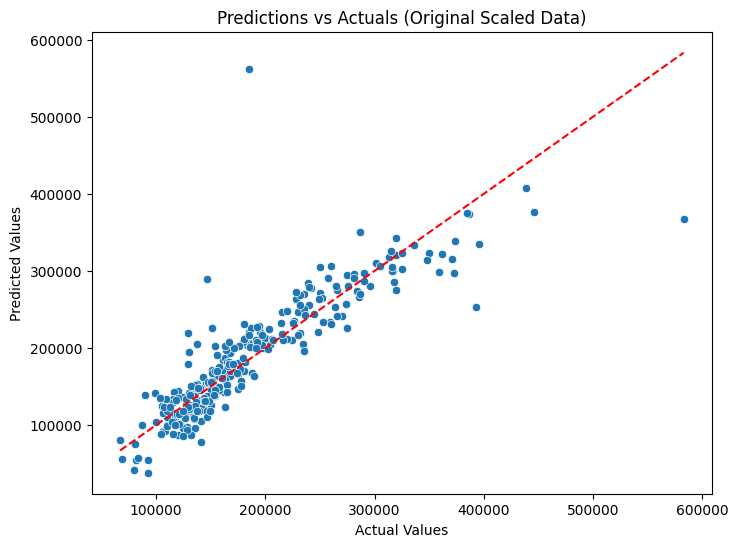

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Plot for original scaled data

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_orig_test, y=y_orig_test_scaled_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predictions vs Actuals (Original Scaled Data)')
plt.plot([y_orig_test.min(), y_orig_test.max()], [y_orig_test.min(), y_orig_test.max()], 'r--') # 45 degree line
plt.show()
